# Trabalho prático 3: análise exploratória de dados

### Separando os dados do dataset geral para cada um dos indicadores e salvando em um arquivo csv


In [1]:
import pandas as pd
from matplotlib import pyplot as plt

caminho: str = './'


def remover_colunas(df: pd.DataFrame, nome_colunas: list[str]) -> pd.DataFrame:
    return df.drop(nome_colunas, axis=1)


def ler_arquivo(nome_arquivo='') -> pd.DataFrame:
    return pd.read_csv(caminho + nome_arquivo)


def gravar_arquivo(df: pd.DataFrame, nome_arquivo=''):
    df.to_csv(caminho + nome_arquivo)


def filtrar_dataset(df: pd.DataFrame, nome_coluna: str, filtro: list[str]) -> pd.DataFrame:
    expressao_query: str = f'`{nome_coluna}` in {filtro}'
    return df.query(expressao_query).reset_index(drop=True)


# dataset completo com todos os dados
df_completo = ler_arquivo(nome_arquivo='WDIData.csv')


# filtros para selecionar dos dados conforme o objetivo do exercicio

filtro_paises_sul_americanos = ['ARG', 'BRA', 'BOL',  'CHL',
                                'COL', 'ECU', 'GUY', 'PER', 'PRY', 'SUR', 'URY', 'VEN']

filtro_mortalidade = [
    'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)']

filtro_inflacao = ['Inflation, consumer prices (annual %)']

filtro_pib = ['GDP per capita growth (annual %)']

filtro_longevidade = ['Life expectancy at birth, total (years)']

# dataframe com os dados apenas dos paises sul americanos
df_paises_sul_americanos = filtrar_dataset(
    df=df_completo,
    nome_coluna='Country Code',
    filtro=filtro_paises_sul_americanos)

gravar_arquivo(df_paises_sul_americanos, 'df_paises_sul_americanos.csv')

# dataframe com os dados da mortalidade infantil
df_mort = filtrar_dataset(
    df=df_paises_sul_americanos,
    nome_coluna="Indicator Name",
    filtro=filtro_mortalidade)

gravar_arquivo(df_mort, 'df_mort_sul_ame.csv')

# dataframe com os dados do PIB
df_pib = filtrar_dataset(
    df=df_paises_sul_americanos,
    nome_coluna="Indicator Name",
    filtro=filtro_pib)

gravar_arquivo(df_pib, 'df_pib_sul_ame.csv')

# dataframe com os dados da inflacao
df_infl = filtrar_dataset(
    df=df_paises_sul_americanos,
    nome_coluna="Indicator Name",
    filtro=filtro_inflacao)

gravar_arquivo(df_infl, 'df_infl_sul_ame.csv')

# dataframe com os dados da longevidade
df_long = filtrar_dataset(
    df=df_paises_sul_americanos,
    nome_coluna="Indicator Name",
    filtro=filtro_longevidade)

gravar_arquivo(df_long, 'df_long_sul_ame.csv')


## 1 - Histograma

### Funcões Gerais


In [2]:
def apagar_colunas_nao_sao_anos(df: pd.DataFrame) -> pd.DataFrame:
    col_apagar = []
    for x in df.columns:
        if not (x.isnumeric()):
            col_apagar.append(x)

    return remover_colunas(df, col_apagar)


def conferir_dados_ausentes(df: pd.DataFrame,  rotulos: list[str], nr_minimo_amostra: int) -> pd.DataFrame:
    validos = []
    ausentes = []
    paises = []
    for indice, linha in df.iterrows():
        dados_pais: pd.Series = linha.to_frame()
        ausentes.append(dados_pais.isna().sum().values[0])
        valido = dados_pais.shape[0] - dados_pais.isna().sum(axis=0).values[0]
        validos.append(valido)
        if(valido < nr_minimo_amostra):
            df.drop(indice, inplace=True)
        else:
            pais = rotulos[indice]
            paises.append(pais)
    dados = pd.DataFrame(
        {'Países': rotulos, 'Válidas': validos, 'Ausentes': ausentes})
    display(dados)

    df['PAIS'] = paises
    df.set_index('PAIS', inplace=True)

    return df


def gerar_grafico_histograma(df: pd.DataFrame, nome_eixo_y: str):

    rotulos = df_mort['Country Name'].reset_index(drop=True)

    # apaga coluna indice que é gerado ao ler
    df = apagar_colunas_nao_sao_anos(df)

    print("\nDados sobre o indicador", nome_eixo_y)
    rotulos_validos = conferir_dados_ausentes(df, rotulos, 20)

    if(len(rotulos_validos)):
        df.dropna(axis=1, inplace=True)
        df.T.hist(figsize=[15, 10])
    else:
        print("Não há dados suficientes para exibir o gráfico sobre", nome_eixo_y)


### Histograma - Indicador de Mortalidade Infantil


In [3]:
dataframe_mort = ler_arquivo('df_mort_sul_ame.csv')
gerar_grafico_histograma(
    dataframe_mort, "Índice de Mortalidade Infantil")



Dados sobre o indicador Índice de Mortalidade Infantil


,Países,Válidas,Ausentes
0,Argentina,4,55
1,Bolivia,4,55
2,Brazil,4,55
3,Chile,4,55
4,Colombia,4,55
5,Ecuador,4,55
6,Guyana,4,55
7,Paraguay,4,55
8,Peru,4,55
9,Suriname,4,55


Não há dados suficientes para exibir o gráfico sobre Índice de Mortalidade Infantil


### Histograma - Indicador do Produto Interno Bruto



Dados sobre o indicador Crescimento Produto Interno Bruto


,Países,Válidas,Ausentes
0,Argentina,57,2
1,Bolivia,57,2
2,Brazil,57,2
3,Chile,57,2
4,Colombia,57,2
5,Ecuador,57,2
6,Guyana,57,2
7,Paraguay,57,2
8,Peru,57,2
9,Suriname,57,2


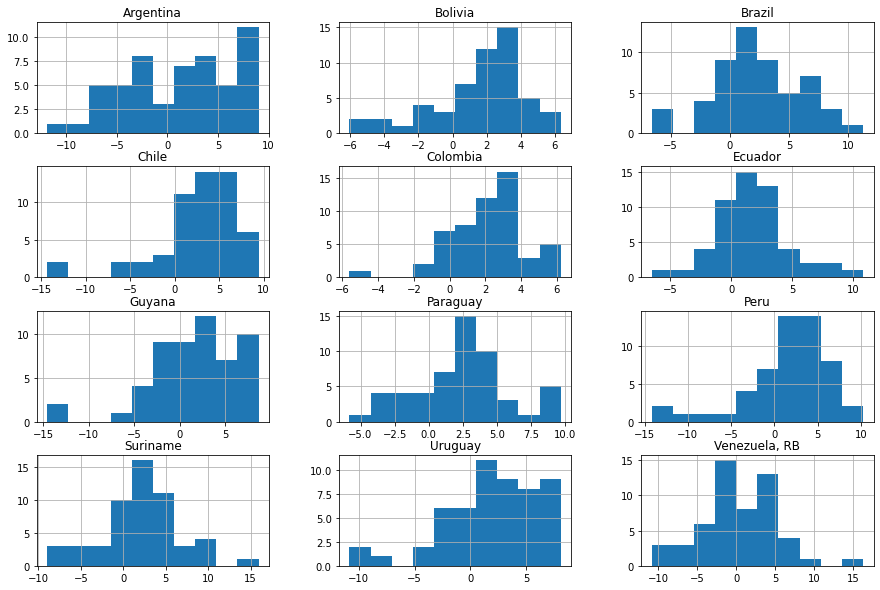

In [4]:

dataframe_pib = ler_arquivo('df_pib_sul_ame.csv')
gerar_grafico_histograma(dataframe_pib, "Crescimento Produto Interno Bruto")


### Histograma - Indicador de Índice de Inflação



Dados sobre o indicador Índice de Inflação


,Países,Válidas,Ausentes
0,Argentina,0,59
1,Bolivia,58,1
2,Brazil,37,22
3,Chile,47,12
4,Colombia,58,1
5,Ecuador,58,1
6,Guyana,23,36
7,Paraguay,58,1
8,Peru,58,1
9,Suriname,58,1


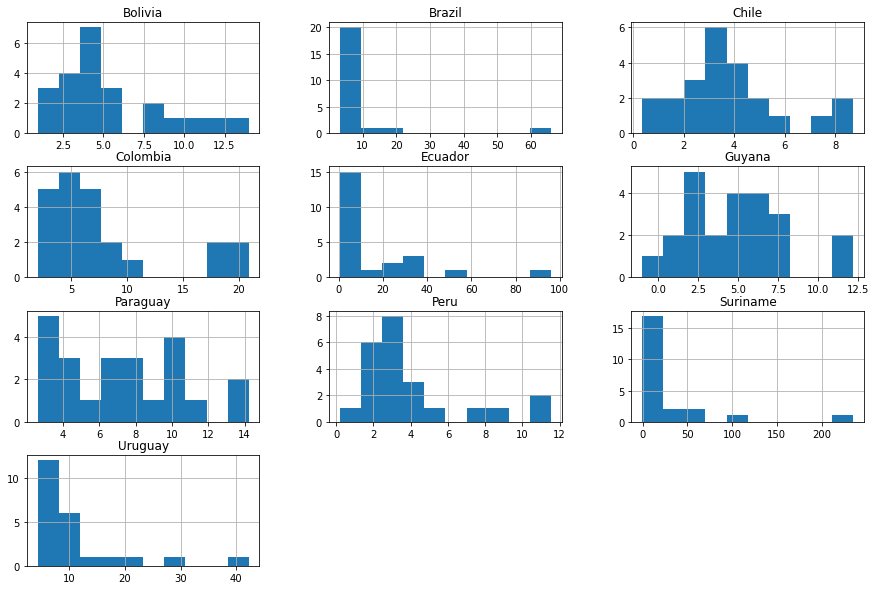

In [5]:

dataframe_infl = ler_arquivo('df_infl_sul_ame.csv')
gerar_grafico_histograma(dataframe_infl, "Índice de Inflação")


### Histograma - Indicador de Expectativa de Vida



Dados sobre o indicador Expectativa média de vida


,Países,Válidas,Ausentes
0,Argentina,58,1
1,Bolivia,58,1
2,Brazil,58,1
3,Chile,58,1
4,Colombia,58,1
5,Ecuador,58,1
6,Guyana,58,1
7,Paraguay,58,1
8,Peru,58,1
9,Suriname,58,1


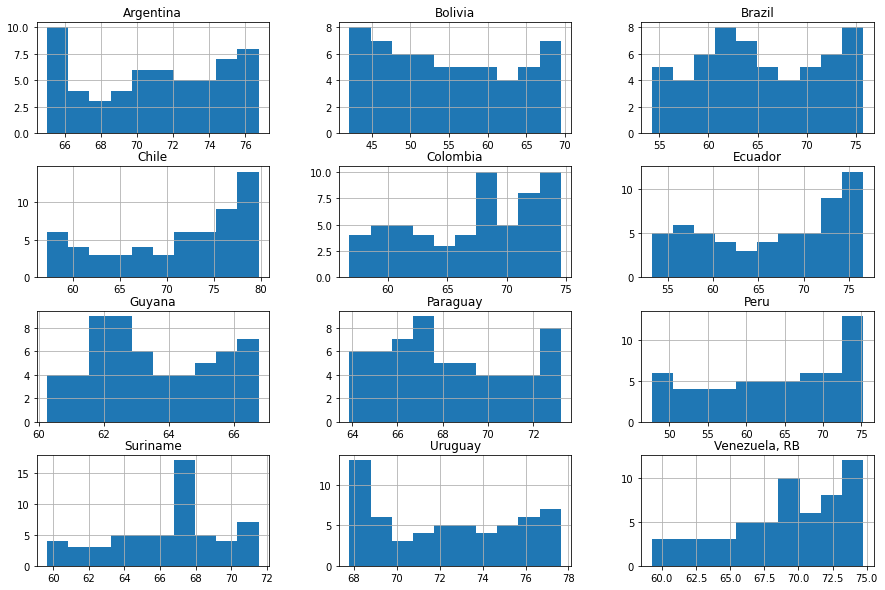

In [6]:

dataframe_long = ler_arquivo('df_long_sul_ame.csv')
gerar_grafico_histograma(dataframe_long, "Expectativa média de vida")


## 2 - Boxplot

### Funções Gerais

In [7]:
def apagar_colunas_nao_sao_anos(df: pd.DataFrame) -> pd.DataFrame:
    col_apagar = []
    for x in df.columns:
        if not (x.isnumeric()):
            col_apagar.append(x)

    return remover_colunas(df, col_apagar)


def conferir_dados_ausentes(df: pd.DataFrame,  rotulos: list[str], nr_minimo_amostra: int) -> pd.Series:
    validos = []
    ausentes = []
    paises = []
    for indice, linha in df.iterrows():
        dados_pais: pd.Series = linha.to_frame()
        ausentes.append(dados_pais.isna().sum().values[0])
        valido = dados_pais.shape[0] - dados_pais.isna().sum(axis=0).values[0]
        validos.append(valido)
        if(valido < nr_minimo_amostra):
            df.drop(indice, inplace=True)
        else:
            pais = rotulos[indice]
            paises.append(pais)
    dados = pd.DataFrame(
        {'Países': rotulos, 'Válidas': validos, 'Ausentes': ausentes})
    display(dados)
    return pd.Series(paises)


def gerar_grafico_box_plot(df: pd.DataFrame, nome_eixo_y: str):

    rotulos = df_mort['Country Name'].reset_index(drop=True)

    # ficam apenas colunas com os anos
    df = apagar_colunas_nao_sao_anos(df)

    rotulos_validos = conferir_dados_ausentes(df, rotulos, 20)

    if(len(rotulos_validos)):
        df.dropna(axis=1, inplace=True)

        fig, ax = plt.subplots()
        fig.set_size_inches(12, 7, forward=True)
        plt.title(nome_eixo_y + " - Países América do Sul", fontsize=15)
        plt.ylabel(nome_eixo_y, fontsize=13)
        plt.xticks(rotation=45)
        ax.boxplot(df.T, labels=rotulos_validos)
        plt.show()
    else:
        print("Não há dados suficientes para exibir o gráfico sobre", nome_eixo_y)


### Boxplot - Indicador de Mortalidade Infantil


In [8]:
dataframe_mort = ler_arquivo('df_mort_sul_ame.csv')
gerar_grafico_box_plot(
    dataframe_mort, "Índice de Mortalidade Infantil")


,Países,Válidas,Ausentes
0,Argentina,4,55
1,Bolivia,4,55
2,Brazil,4,55
3,Chile,4,55
4,Colombia,4,55
5,Ecuador,4,55
6,Guyana,4,55
7,Paraguay,4,55
8,Peru,4,55
9,Suriname,4,55


Não há dados suficientes para exibir o gráfico sobre Índice de Mortalidade Infantil


C:\Users\aliss\AppData\Local\Temp/ipykernel_17824/2590151524.py:27: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series(paises)


### Boxplot - Indicador do Produto Interno Bruto


,Países,Válidas,Ausentes
0,Argentina,57,2
1,Bolivia,57,2
2,Brazil,57,2
3,Chile,57,2
4,Colombia,57,2
5,Ecuador,57,2
6,Guyana,57,2
7,Paraguay,57,2
8,Peru,57,2
9,Suriname,57,2


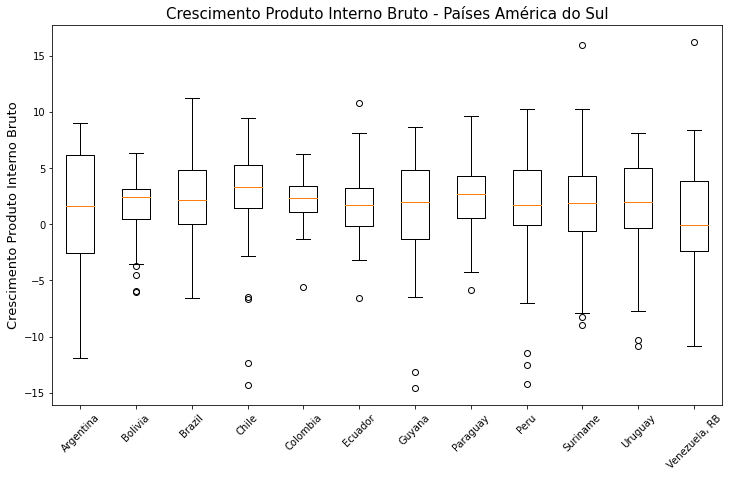

In [9]:
dataframe_pib = ler_arquivo('df_pib_sul_ame.csv')
gerar_grafico_box_plot(dataframe_pib, "Crescimento Produto Interno Bruto")


### Boxplot - Indicador de Índice de Inflação


,Países,Válidas,Ausentes
0,Argentina,0,59
1,Bolivia,58,1
2,Brazil,37,22
3,Chile,47,12
4,Colombia,58,1
5,Ecuador,58,1
6,Guyana,23,36
7,Paraguay,58,1
8,Peru,58,1
9,Suriname,58,1


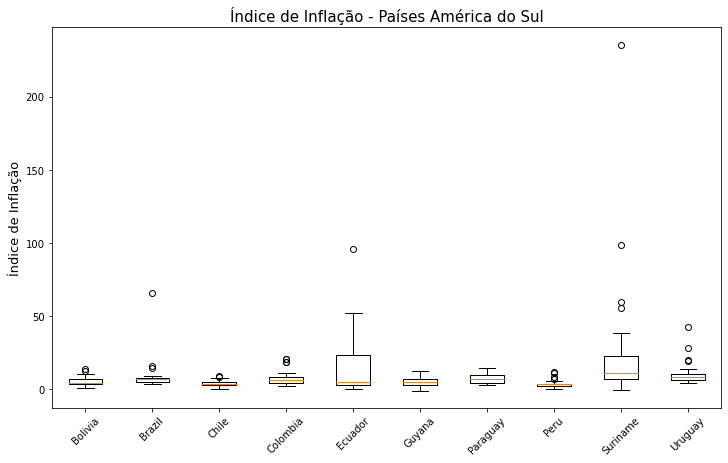

In [10]:
dataframe_infl = ler_arquivo('df_infl_sul_ame.csv')
gerar_grafico_box_plot(dataframe_infl, "Índice de Inflação")


### Boxplot - Indicador de Expectativa de Vida


,Países,Válidas,Ausentes
0,Argentina,58,1
1,Bolivia,58,1
2,Brazil,58,1
3,Chile,58,1
4,Colombia,58,1
5,Ecuador,58,1
6,Guyana,58,1
7,Paraguay,58,1
8,Peru,58,1
9,Suriname,58,1


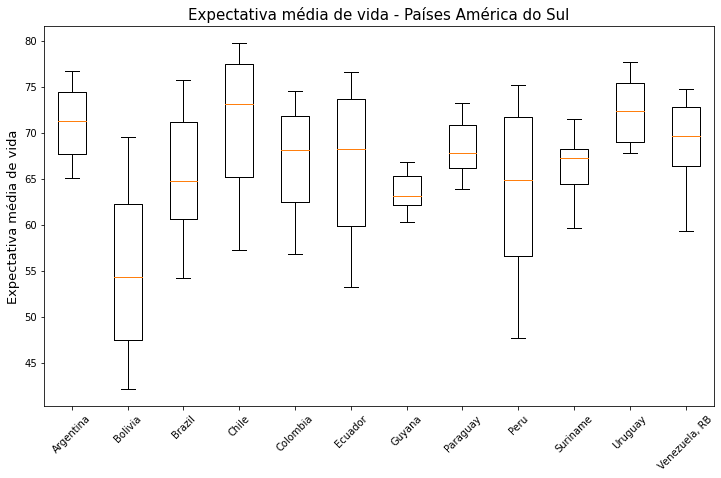

In [11]:

dataframe_long = ler_arquivo('df_long_sul_ame.csv')
gerar_grafico_box_plot(
    dataframe_long, "Expectativa média de vida")


## 3 - Um gráfico de correlação entre os indicadores 2 e 3


'Argentina'

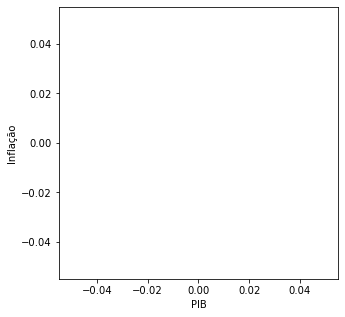

'Bolivia'

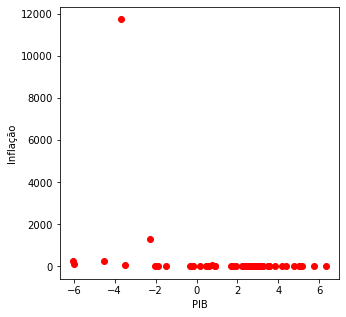

'Brazil'

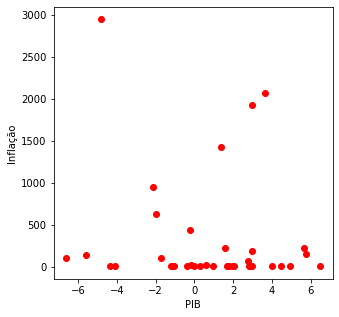

'Chile'

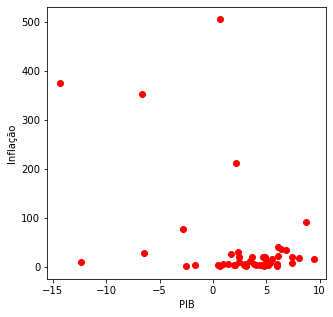

'Colombia'

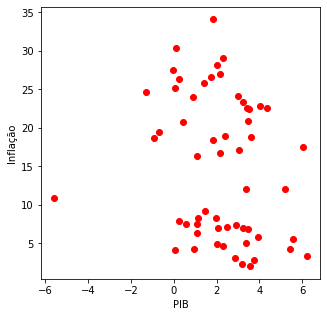

'Ecuador'

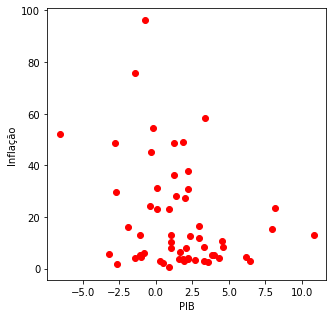

'Guyana'

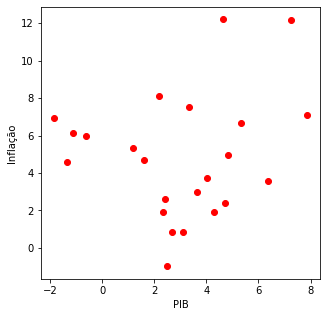

'Paraguay'

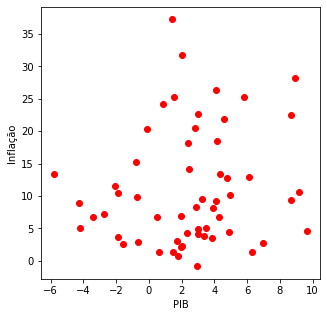

'Peru'

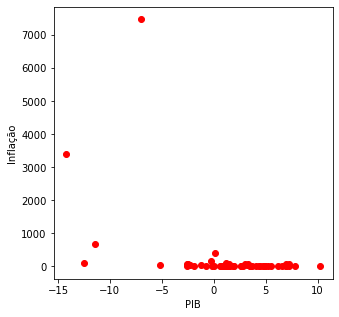

'Suriname'

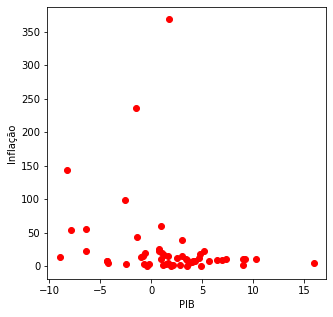

'Uruguay'

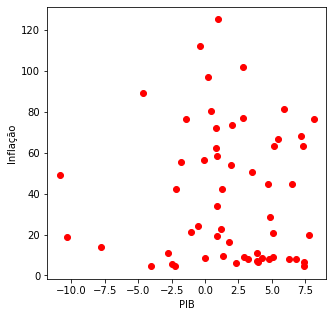

'Venezuela, RB'

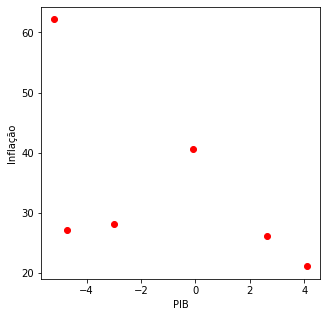

In [12]:
import matplotlib.pyplot as plt
import sys


def apagar_colunas_nao_sao_anos(df: pd.DataFrame) -> pd.DataFrame:
    col_apagar = []
    for x in df.columns:
        if not (x.isnumeric()):
            col_apagar.append(x)

    return remover_colunas(df, col_apagar)

# lendo os dataframes
dataframe_pib = ler_arquivo('df_pib_sul_ame.csv')
dataframe_infl = ler_arquivo('df_infl_sul_ame.csv')

# separando o nome dos países
rotulos = dataframe_pib['Country Name'].reset_index(drop=True)

# ficam apenas colunas com os anos
df_pib = apagar_colunas_nao_sao_anos(dataframe_pib)
df_infl = apagar_colunas_nao_sao_anos(dataframe_infl)

# garantindo que tenham o mesmo tamanho as séries
if len(df_pib.columns) != len(df_infl.columns):
    print("Tamanhos das séries diferentes, utilizar outra estratégia.")
    sys.exit()

dados_pib = []

for col, lin in df_pib.iterrows():
    registros_serie = lin.to_frame().T
    dados_pib.append(registros_serie)

dados_infl = []

for col, lin in df_infl.iterrows():
    registros_serie = lin.to_frame().T
    dados_infl.append(registros_serie)

df_cor = pd.DataFrame(
    {'pib': dados_pib, 'infl': dados_infl,  'paises': rotulos})

for i, j in df_cor.iterrows():
    x = j.T['pib']
    y = j.T['infl']
    display(j['paises'])
    plt.figure(figsize=(5, 5))
    plt.xlabel("PIB")
    plt.ylabel("Inflação")
    plt.scatter(x, y, c='red')
    plt.show()

    


## 4 - Um gráfico de correlação entre os indicadores 2 e 4


Argentina


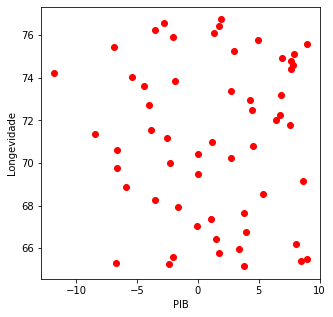

Bolivia


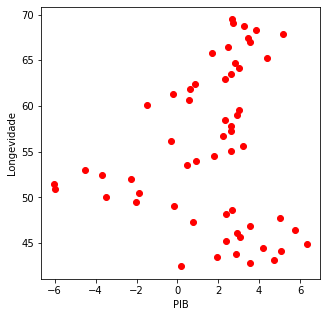

Brazil


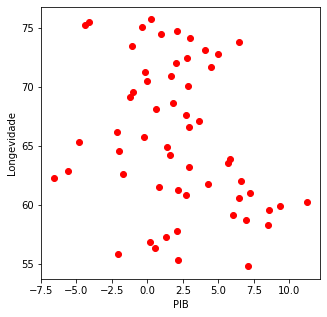

Chile


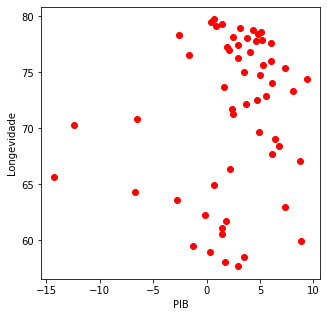

Colombia


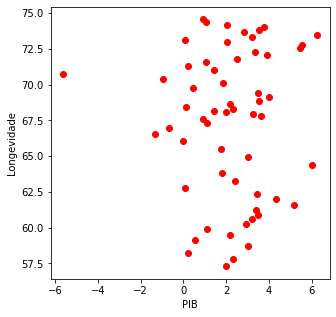

Ecuador


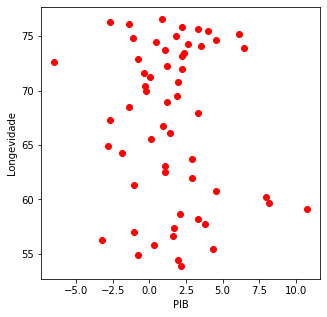

Guyana


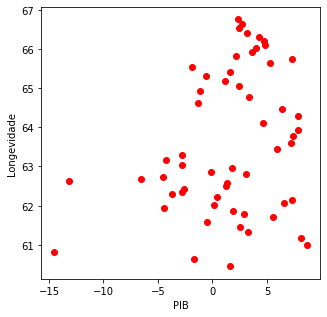

Paraguay


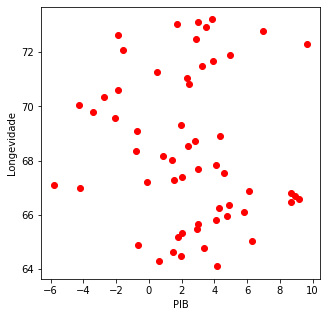

Peru


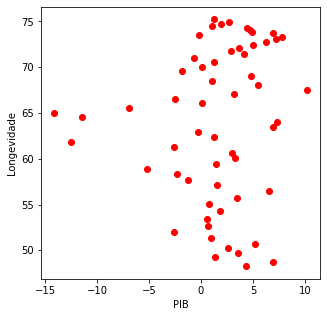

Suriname


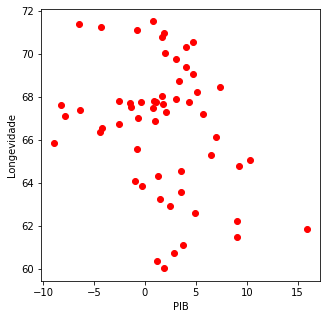

Uruguay


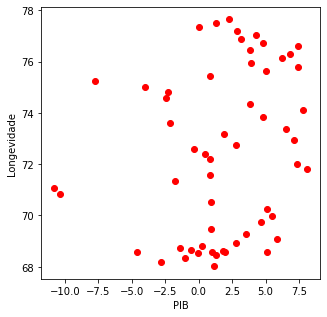

Venezuela, RB


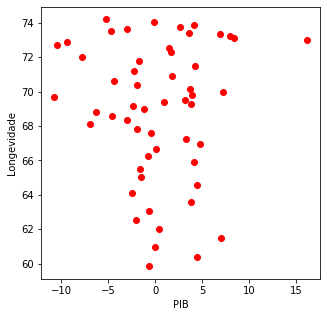

In [13]:
import matplotlib.pyplot as plt
import sys


def apagar_colunas_nao_sao_anos(df: pd.DataFrame) -> pd.DataFrame:
    col_apagar = []
    for x in df.columns:
        if not (x.isnumeric()):
            col_apagar.append(x)

    return remover_colunas(df, col_apagar)


# ler dataframes
dataframe_pib = ler_arquivo('df_pib_sul_ame.csv')
dataframe_long = ler_arquivo('df_long_sul_ame.csv')

# separar nome dos países
rotulos = dataframe_pib['Country Name'].reset_index(drop=True)

# ficam apenas colunas com os anos
df_pib = apagar_colunas_nao_sao_anos(dataframe_pib)
df_long = apagar_colunas_nao_sao_anos(dataframe_long)

if len(df_pib.columns) != len(df_long.columns):
    print("Tamanhos das séries diferentes, utilizar outra estratégia.")
    sys.exit()

dados_pib = []

for col, lin in df_pib.iterrows():
    registros_serie = lin.to_frame().T
    dados_pib.append(registros_serie)

dados_long = []

for col, lin in df_long.iterrows():
    registros_serie = lin.to_frame().T
    dados_long.append(registros_serie)

df_cor = pd.DataFrame(
    {'pib': dados_pib, 'long': dados_long,  'paises': rotulos})

for i, j in df_cor.iterrows():
    x = j.T['pib']
    y = j.T['long']
    print(j['paises'])
    plt.figure(figsize=(5, 5))
    plt.xlabel("PIB")
    plt.ylabel("Longevidade")
    plt.scatter(x, y, c='red')
    plt.show()
